In [1]:
import os
from pathlib import Path
import sys

In [2]:
sys.path.append(str(Path(os.getcwd()).parent))

In [3]:
import numpy as np
import pandas as pd

In [4]:
from matplotlib import pyplot as plt

In [5]:
from bankchurn.utils import load_data

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.metrics import roc_curve, RocCurveDisplay

In [70]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [71]:
from sklearn.metrics import roc_auc_score

# 1. Load Data

In [6]:
data = load_data()

In [10]:
data = data.drop(columns=["customer_id"])

In [14]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Encoding of Variables

## 2.1. Gender

In [15]:
data["gender"] = [0 if x == "Female" else 1 for x in data["gender"]]

## 2.2. Country

In [28]:
data["country"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [43]:
ohe_country = OneHotEncoder(categories=[["France", "Germany", "Spain"]])

In [44]:
data[["France_ohe", "Germany_ohe", "Spain_ohe"]] = ohe_country.fit_transform(data["country"].values.reshape(-1, 1)).toarray()

In [46]:
data = data.drop(columns=["country"])

In [45]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,France_ohe,Germany_ohe,Spain_ohe
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


# 3. Prepare Train & Test Datasets

In [47]:
X, y = data[[c for c in data.columns if c != "churn"]], data[["churn"]]

In [48]:
X.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,France_ohe,Germany_ohe,Spain_ohe
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# 4. Fit Model and Predict In-Sample

In [125]:
dt_tree = DecisionTreeClassifier(max_depth=2)

In [126]:
dt_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [127]:
y_train_hat = dt_tree.predict(X_train)

In [128]:
y_train_hat_score = dt_tree.predict_proba(X_train)[:, 1]

In [134]:
set(y_train_hat_score)

{np.float64(0.10137085137085138),
 np.float64(0.26635514018691586),
 np.float64(0.6040076335877863),
 np.float64(0.75)}

In [130]:
y_test_hat_score = dt_tree.predict_proba(X_test)[:, 1]

In [131]:
# fpr, tpr, _ = roc_curve(y_train, y_train_hat_score)
fpr, tpr, lvls = roc_curve(y_test, y_test_hat_score)

In [132]:
lvls

array([       inf, 0.75      , 0.60400763, 0.26635514, 0.10137085])

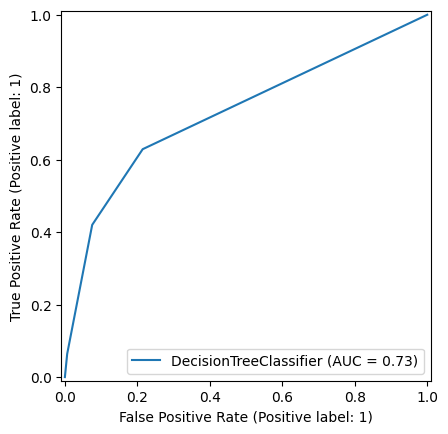

In [133]:
# RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
dt_tree_disp = RocCurveDisplay.from_estimator(dt_tree, X_test, y_test)
plt.show()